Install drive dependencies for uploading data file

In [ ]:
pip install pydrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials



Authentication for drive account

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Uploading data file

In [ ]:

downloaded = drive.CreateFile({'id':"1GmX3p8ihPjLJXAPnvo_12lDZOiUhFj8s"})
downloaded.GetContentFile('projectDataset.csv')



Data wrangling and observation

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('projectDataset.csv')
df.head(10)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean.1,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,...,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.00,0.000000,75.0,75.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,...,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.00,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.00,2261.327486,4254.0,1056.0,0.0,0.000000,0.000000,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,...,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.00,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.50,0.707107,71.0,70.0,0.0,0.000000,0.000000,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,...,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.50,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.00,0.000000,151.0,151.0,0.0,0.000000,0.000000,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,...,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.00,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.50,0.707107,77.0,76.0,76.0,76.000000,0.000000,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,...,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.50,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
5,192.168.0.24-101.79.244.148-41980-443-6,192.168.0.24,41980,101.79.244.148,443,6,10/09/2019 01:39:13 AM,157,2,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,19108.280255,78.50,6.363961,83.0,74.0,74.0,74.000000,0.000000,74.0,74.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,...,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,0.000000,0.0,0.000000,0,0,0,0,0,0,2,0,1,0,-1,5840,0,0,0.0,0.0,0.0,0.0,78.50,6.363961,83.0,74.0,Anomaly,Mirai,Mirai-Hostbrutefor

In [ ]:
df.tail(10)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean.1,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,...,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
625773,192.168.0.24-210.89.164.90-60165-8899-17,192.168.0.24,60165,210.89.164.90,8899,17,25/07/2019 03:21:00 AM,29,5,1,160.0,32.0,32.0,32.0,32.0,0.0,32.0,32.0,32.0,0.000000,6.620690e+06,206896.551724,5.8,3.346640,11.0,3.0,22.0,5.5,3.785939,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,32.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,37.333333,32.0,32.0,0,0,0,0,0,0,5,160,1,32,-1,-1,5,0,0.0,0.0,0.0,0.0,5.8,3.346640,11.0,3.0,Anomaly,Mirai,Mirai-UDP Flooding
625774,192.168.0.24-104.118.134.215-43238-443-6,104.118.134.215,443,192.168.0.24,43238,6,25/07/2019 03:25:46 AM,155,1,1,1441.0,1441.0,1441.0,1441.0,1441.0,0.0,1441.0,1441.0,1441.0,0.000000,1.859355e+07,12903.225806,155.0,0.000000,155.0,155.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,1441.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,2161.500000,1441.0,1441.0,0,0,0,0,0,0,1,1441,1,1441,-1,252,1,0,0.0,0.0,0.0,0.0,155.0,0.000000,155.0,155.0,Anomaly,Mirai,Mirai-HTTP Flooding
625775,192.168.0.24-223.39.123.191-37557-443-6,192.168.0.24,37557,223.39.123.191,443,6,25/07/2019 03:23:46 AM,75,0,2,0.0,37.0,0.0,0.0,0.0,0.0,37.0,0.0,18.5,26.162951,4.933333e+05,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.000000,0.0,0.0,75.0,75.0,0.0,75.0,75.0,0,1,0,0,...,24.666667,21.361960,456.333333,0,0,0,1,1,0,0,0,0.0,37.000000,0.0,18.5,0,0,0,0,0,0,0,0,2,37,-1,17779,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Anomaly,Mirai,Mirai-Ackflooding
625776,192.168.0.24-111.57.139.118-19604-8739-6,111.57.139.118,8739,192.168.0.24,19604,6,04/06/2019 11:44:26 PM,1092,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,1831.501832,1092.0,0.000000,1092.0,1092.0,0.0,0.0,0.000000,0.0,0.0,1092.0,1092.0,0.0,1092.0,1092.0,0,0,0,0,...,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,0,0,0,0,2,0,-1,0,0,0,0.0,0.0,0.0,0.0,1092.0,0.000000,1092.0,1092.0,Anomaly,DoS,DoS-Synflooding
625777,192.168.0.13-192.168.0.16-9020-56266-6,192.168.0.16,56266,192.168.0.13,9020,6,10/09/2019 01:47:49 AM,116,0,2,0.0,1418.0,0.0,0.0,0.0,0.0,1388.0,30.0,709.0,960.251009,1.222414e+07,17241.379310,116.0,0.000000,116.0,116.0,0.0,0.0,0.000000,0.0,0.0,116.0,116.0,0.0,116.0,116.0,0,0,0,0,...,935.333333,784.041666,614721.333333,0,0,0,0,1,0,0,0,0.0,1403.000000,0.0,709.0,0,0,0,0,0,0,0,0,2,1418,-1,1869,0,0,0.0,0.0,0.0,0.0,116.0,0.000000,116.0,116.0,Anomaly,Mirai,Mirai-Hostbruteforceg
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,18.0,18.0,18.0,18.0,18.0,0.0,18.0,18.0,18.0,0.000000,1.299639e+05,7220.216606,277.0,0.000000,277.0,277.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,18.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1.0,27.000000,18.0,18.0,0,0,0,0,0,0,1,18,1,18,-1,-1,1,0,0.0,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

Data dimensionality

In [ ]:
df.shape

(625783, 86)

Assure no missing data

In [ ]:

df.isna().any().any()

False

Information of data columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

Data cleaning

In [ ]:
#choose specific column to train our model on
#drop ID's to prevent overfitting of modelling with unique identifier
df.drop(['Flow_ID','Cat','Sub_Cat'],inplace=True,axis=1)


In [ ]:
df.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean.1,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,...,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,...,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly
1,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,...,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly
2,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,...,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly
3,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,...,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly
4,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,...,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly


In [ ]:
#dealing with datetime data
df.Timestamp=pd.to_datetime(df.Timestamp,errors='coerce')


In [ ]:
#break apart the date and get the year, month, week of year, day of month, hour, minute, second
dtime=pd.DataFrame()
dtime['year'] = df['Timestamp'].dt.year
dtime['month'] = df['Timestamp'].dt.month
dtime['hour'] = df['Timestamp'].dt.hour
dtime['minute'] = df['Timestamp'].dt.minute
dtime['day_of_week'] = df['Timestamp'].dt.dayofweek
dtime.head()

,year,month,hour,minute,day_of_week
0,2019,7,3,25,3
1,2019,5,22,11,6
2,2019,11,1,24,3
3,2019,4,3,58,1
4,2019,10,1,41,2


In [ ]:
dtime.day_of_week.value_counts()

3    369761
2     79078
1     58217
6     44666
0     40073
4     19263
5     14725
Name: day_of_week, dtype: int64

In [ ]:
dtime.hour.value_counts()

3     376195
1     138229
22     44666
4      43576
23     14725
5       8392
Name: hour, dtype: int64

In [ ]:
dtime.minute.value_counts()

20    89507
25    62160
21    55026
23    47810
24    28635
3     20866
6     18758
11    17504
22    17000
26    15994
16    14544
47    13283
27    12975
44    12786
4     12599
58    12495
59    10985
56    10881
57    10711
0      8625
41     7609
15     7438
17     7231
55     6780
38     6347
29     5601
12     5421
39     5315
52     5179
45     5171
54     5056
7      4984
30     4775
50     4395
5      4381
28     4176
53     4134
19     3867
34     3537
48     3084
43     3052
51     3005
42     3001
1      2868
46     2561
31     2367
40     2366
49     2331
14     1774
18     1700
8      1698
2      1145
10      264
33       26
Name: minute, dtype: int64

In [ ]:
dtime.month.value_counts()

7     294496
5     104002
11     75265
10     62964
8      38397
4      34545
3      16114
Name: month, dtype: int64

In [ ]:
dtime.year.value_counts()

2019    625783
Name: year, dtype: int64

In [ ]:
df.drop('Timestamp',inplace=True,axis=1)

In [ ]:
df.insert(3,'month',dtime['month'])
df.insert(4,'day',dtime['day_of_week'])
df.insert(5,'hour',dtime['hour'])
df.head()

,Src_IP,Src_Port,Dst_IP,month,day,hour,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean.1,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,...,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,192.168.0.13,10000,192.168.0.16,7,3,3,10101,17,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,...,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly
1,222.160.179.132,2179,192.168.0.13,5,6,22,554,6,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly
2,192.168.0.16,52727,192.168.0.13,11,3,1,9020,6,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,...,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly
3,192.168.0.16,52964,192.168.0.13,4,1,3,9020,6,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,...,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly
4,192.168.0.1,36763,239.255.255.250,10,2,1,1900,17,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,...,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly


Data encoding

In [ ]:
#encode categorical data
#select record with object
df.select_dtypes(include=object)


,Src_IP,Dst_IP,Label
0,192.168.0.13,192.168.0.16,Anomaly
1,222.160.179.132,192.168.0.13,Anomaly
2,192.168.0.16,192.168.0.13,Anomaly
3,192.168.0.16,192.168.0.13,Anomaly
4,192.168.0.1,239.255.255.250,Anomaly
...,...,...,...
625778,192.168.0.24,210.89.164.90,Anomaly
625779,222.131.171.244,192.168.0.13,Anomaly
625780,192.168.0.16,192.168.0.13,Anomaly
625781,192.168.0.13,192.168.0.16,Normal


IP addresses is spoofed by attaker hence it is not an independent feature.
so, we will remove it.
here a full paper explains this.

[see paper](https://www.researchgate.net/publication/309467794_A_study_on_efficient_detection_of_network-based_IP_spoofing_DDoS_and_malware-infected_Systems)


In [ ]:
df.drop(['Src_IP','Dst_IP','Dst_Port','Src_Port'], inplace=True,axis=1)

In [ ]:
df.head()

,month,day,hour,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean.1,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,...,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,7,3,3,17,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,...,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly
1,5,6,22,6,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,...,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly
2,11,3,1,6,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,...,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly
3,4,1,3,6,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,...,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly
4,10,2,1,17,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,...,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly


Fix data issues

In [ ]:
#after feature scaling we found the dataset contains infinte records
#to be removed from the data by replace it into NaN then to drop the Nans
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)

Data split

In [ ]:
#split the data of features and labels
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


Label encoding

In [ ]:
#encode labels
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
le=LabelEncoder()
y=le.fit_transform(y)



Data split for training nd validation

In [ ]:
#split dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=42)

Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
y_train=ss.fit_transform(y_train.reshape(-1,1))


Data modeling

#clustering
#### -1 KMeans
Determine number of clusters using Elbow method

As shown below, elbow method indicates that the optimal cluster numbers are 3 not 2 as we planned to classify our dataset. we choose number of clusters as 2 then validate the model


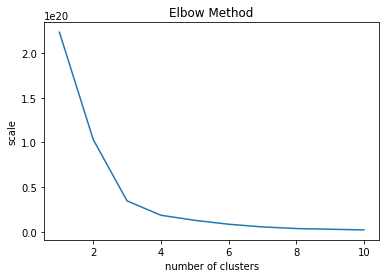

In [ ]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
temp=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(X)
    temp.append(km.inertia_)
plt.plot(range(1,11),temp)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('scale')
plt.show()

Fitting Kmeans algorithm :

In [ ]:
km=KMeans(n_clusters=2,init='k-means++',random_state= 42)
km.fit(X)
y_km = km.fit_predict(X)

##### KMeans validation:
as shown below the result is too small and too close to perfect match that should be 0 or 1.

In [ ]:
from sklearn.metrics import adjusted_rand_score
km_score=adjusted_rand_score(y,y_km)
km_score

-2.3827142659667815e-05

#### -2 Meanshift Clustering Algorithm:
as this cluster algorithm cannot handle large scale of data and has a time complexity of O(n^2), we fit a subset of our data set

In [ ]:
from sklearn.cluster import MeanShift
ms=MeanShift()
ms.fit(X[:20000,:])
y_ms=ms.predict(X[:20000,:])

In [ ]:
ms_score=adjusted_rand_score(y[:20000],y_ms)
ms_score

-0.014985206789542621

in the plot below , it's seen that kmeans cluster is so close to the perfect cluster of value of 1 and the meanshift cluster is not visible so that it's not approperiate algorithm.

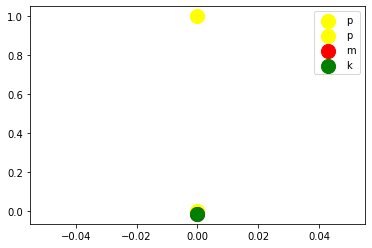

In [ ]:

plt.scatter(0,0,c='yellow',s=200)
plt.scatter(0,1,c='yellow',s=200)
plt.scatter(0,ms_score,c='red',s=200)
plt.scatter(0,ms_score,c='green',s=200)

plt.legend('ppmk')


#Classification
#### 1- SVC

In [ ]:
#convert df into int so that we can perform classification
X_train=X_train.astype(int)
y_train=y_train.astype(int)
X_test=X_test.astype(int)
y_test=y_test.astype(int)


In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', random_state = 0)
clf.fit(X_train, y_train.ravel())

# Predicting the Train|Test set results
y_pred_train_SVC= clf.predict(X_train)
y_pred_test_SVC = clf.predict(X_test)


In [ ]:
#report
from sklearn.metrics import classification_report
print('Training Report: ')
print(classification_report(y_train, y_pred_train_SVC,zero_division=0));
print('Testing Report: ')
print(classification_report(y_test, y_pred_test_SVC,zero_division=0));

Training Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    392304
           3       1.00      1.00      1.00     26724

    accuracy                           1.00    419028
   macro avg       1.00      1.00      1.00    419028
weighted avg       1.00      1.00      1.00    419028

Testing Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193038
           1       0.00      0.00      0.00     13349
           3       0.00      0.00      0.00         0

    accuracy                           0.94    206387
   macro avg       0.33      0.33      0.33    206387
weighted avg       0.94      0.94      0.94    206387



#### -2 Descision Tree

Training Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    392304
           3       1.00      1.00      1.00     26724

    accuracy                           1.00    419028
   macro avg       1.00      1.00      1.00    419028
weighted avg       1.00      1.00      1.00    419028

Testing Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193038
           1       0.00      0.00      0.00     13349
           3       0.00      0.00      0.00         0

    accuracy                           0.94    206387
   macro avg       0.33      0.33      0.33    206387
weighted avg       0.94      0.94      0.94    206387



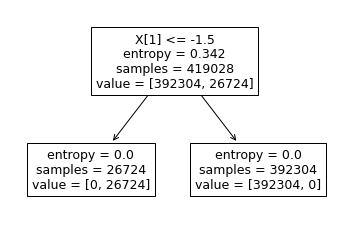

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier( criterion ='entropy',random_state=0)
clf1.fit(X_train,y_train)
y_pred_train_dt=clf1.predict(X_train)
y_pred_test_dt=clf1.predict(X_test)
#visualization
from sklearn import tree 
tree.plot_tree(clf1);
print('Training Report: ')
print(classification_report(y_train, y_pred_train_dt,zero_division=0));
print('Testing Report: ')
print(classification_report(y_test, y_pred_test_dt,zero_division=0));

3- KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
clf2=KNeighborsClassifier(n_neighbors=2)
clf2.fit(X_train[:20000,:],y_train[:20000].ravel())


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
#prediction
y_pred_train_knn=clf2.predict(X_test[:20000,:])
y_pred_test_knn=clf2.predict(X_test[:20000,:])



In [ ]:
print('Training Report: ')
print(classification_report(y_train[:20000], y_pred_train_knn[:20000],zero_division=0));
print('Testing Report: ')
print(classification_report(y_test[:20000], y_pred_test_knn[:20000],zero_division=0));


Training Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     18645
           3       0.06      0.06      0.06      1355

    accuracy                           0.87     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.87      0.87      0.87     20000

Testing Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18648
           1       0.00      0.00      0.00      1352
           3       0.00      0.00      0.00         0

    accuracy                           0.93     20000
   macro avg       0.33      0.33      0.33     20000
weighted avg       0.93      0.93      0.93     20000



#### -4 XGBoost

In [ ]:

from xgboost import XGBClassifier
clf3 = XGBClassifier()
clf3.fit(X_train, y_train.ravel())

# Predicting the Test set results
y_pred_test_xg = clf3.predict(X_test)
y_pred_train_xg = clf3.predict(X_train)


In [ ]:
print('Training Report: ')
print(classification_report(y_train, y_pred_train_xg,zero_division=0));
print('Testing Report: ')
print(classification_report(y_test, y_pred_test_xg,zero_division=0));


Training Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    392304
           3       1.00      1.00      1.00     26724

    accuracy                           1.00    419028
   macro avg       1.00      1.00      1.00    419028
weighted avg       1.00      1.00      1.00    419028

Testing Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193038
           1       0.00      0.00      0.00     13349
           3       0.00      0.00      0.00         0

    accuracy                           0.94    206387
   macro avg       0.33      0.33      0.33    206387
weighted avg       0.94      0.94      0.94    206387



#### -5 Naive Bayes

In [ ]:

from sklearn.naive_bayes import GaussianNB
clf4 = GaussianNB()
clf4.fit(X_train, y_train)

# Predicting the Test set results
y_pred_test_nb = clf4.predict(X_test)
y_pred_train_nb = clf4.predict(X_train)
print('Training Report: ')
print(classification_report(y_train, y_pred_train_nb,zero_division=0));
print('Testing Report: ')
print(classification_report(y_test, y_pred_test_nb,zero_division=0));


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    392304
           3       1.00      1.00      1.00     26724

    accuracy                           1.00    419028
   macro avg       1.00      1.00      1.00    419028
weighted avg       1.00      1.00      1.00    419028

Testing Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193038
           1       0.00      0.00      0.00     13349
           3       0.00      0.00      0.00         0

    accuracy                           0.94    206387
   macro avg       0.33      0.33      0.33    206387
weighted avg       0.94      0.94      0.94    206387



#### Comparing Algorithms

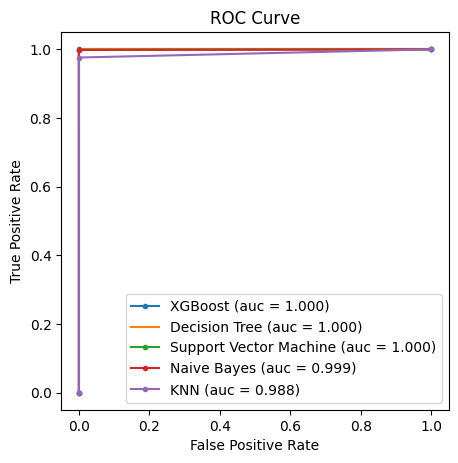

In [ ]:
from sklearn.metrics import roc_curve, auc

svc_fpr, svc_tpr, threshold = roc_curve(y_test, y_pred_test_SVC)
auc_svc = auc(svc_fpr, svc_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred_test_dt)
auc_dt = auc(dt_fpr, dt_tpr)

nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_test_nb)
auc_nb = auc(nb_fpr, nb_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test[:20000], y_pred_test_knn[:20000])
auc_knn = auc(knn_fpr, knn_tpr)

xg_fpr, xg_tpr, threshold = roc_curve(y_test, y_pred_test_xg)
auc_xg = auc(xg_fpr, xg_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(xg_fpr, xg_tpr, marker='.', label='XGBoost (auc = %0.3f)' % auc_xg)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree (auc = %0.3f)' % auc_dt)
plt.plot(svc_fpr, svc_tpr, marker='.', label='Support Vector Machine (auc = %0.3f)' % auc_svc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (auc = %0.3f)' % auc_nb)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (auc = %0.3f)' % auc_knn)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()